## Task 2: Develop Time Series Forecasting Models
This task involves building a time series forecasting model to predict Tesla's future stock prices. Below are the step-by-step instructions to develop, evaluate, and refine a forecasting model using common techniques such as ARIMA, SARIMA, or LSTM.


In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ------------------------------- ------ 524.3/625.1 kB 840.2 kB/s eta 0:00:01
   ------------------------------- ------ 524.3/625.1 kB 840.2 kB/s eta 0:00:01
   -------------------------------------- 625.1/625.1 kB 473.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB

In [9]:
data_tsla=yf.download('TSLA',start='2015-01-01', end='2023-01-01').dropna()['Close']
data_spy=yf.download('SPY',start='2015-01-01', end='2023-01-01').dropna()['Close']
data_bnd=yf.download('BND',start='2015-01-01', end='2023-01-01').dropna()['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


split the data

In [17]:
def split_data(data):
  train_size = int(len(data) * 0.8)
  train, test = data[:train_size], data[train_size:]
  return train,test

In [21]:
train,test=split_data(data_tsla)

Train the ARIMA Model

In [22]:
from pmdarima import auto_arima

# Fit ARIMA model
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8340.014, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8331.877, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8331.767, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8340.213, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8333.757, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8333.735, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8335.392, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8332.366, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.272 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1611
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -4162.884
Date:                Tue, 04 Mar 2025   AIC           

Forecast Future Prices

In [25]:

forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

forecast_series = pd.Series(forecast, index=test.index)

c:\Users\ASUS VIVO\.conda\envs\me\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS VIVO\.conda\envs\me\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [28]:
def visulaize(train,test,company):
 plt.figure(figsize=(14, 7))
 plt.plot(train.index, train, label='Training Data', color='blue')
 plt.plot(test.index, test, label='Test Data', color='orange')
 plt.plot(forecast_series.index, forecast_series, label='Forecast', color='green')
 plt.fill_between(forecast_series.index, conf_int[:, 0], conf_int[:, 1], color='green', alpha=0.3)
 plt.title(company+'Stock Price Forecast')
 plt.xlabel('Date')
 plt.ylabel('Price ($)')
 plt.legend()
 plt.show()

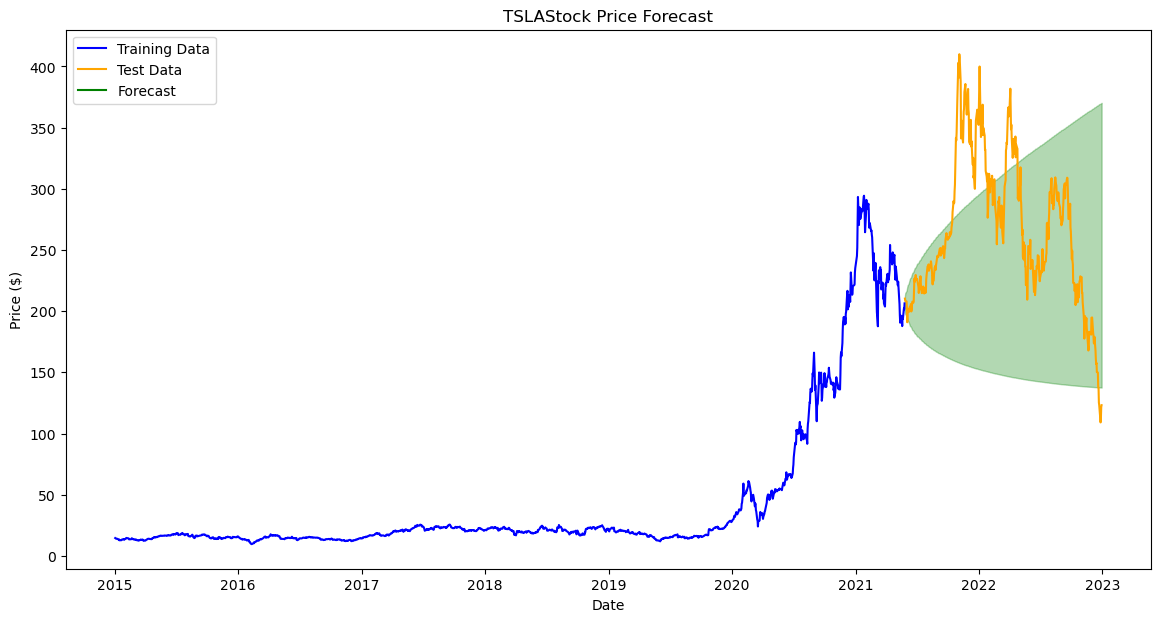

In [29]:
visulaize(train,test,'TSLA')

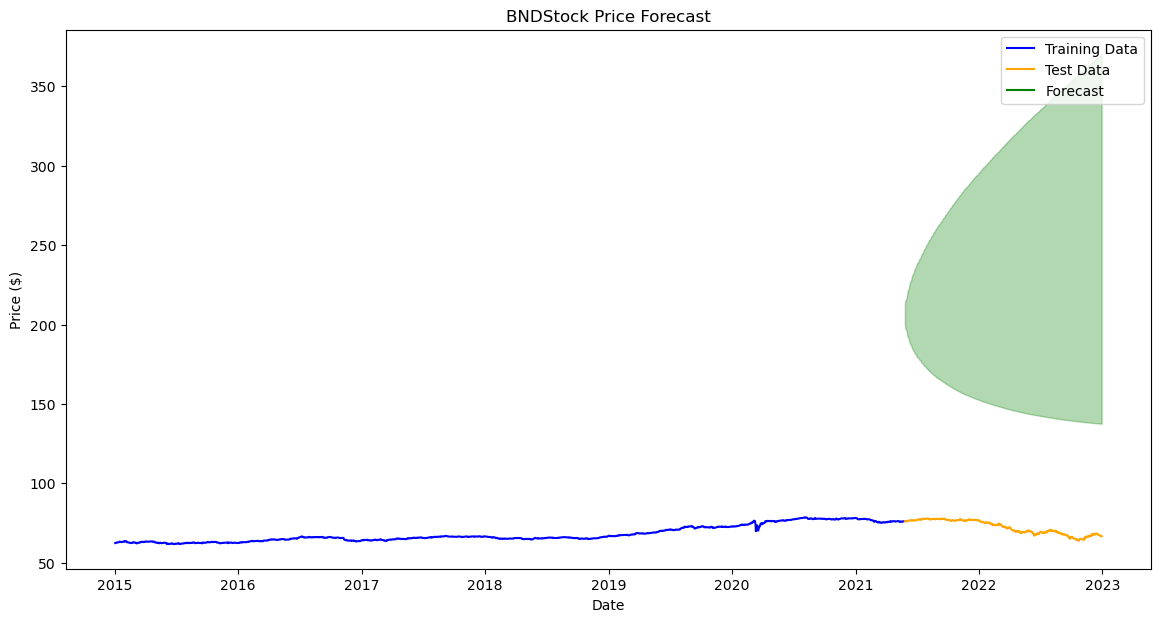

In [30]:
train,test=split_data(data_bnd)
visulaize(train,test,'BND')


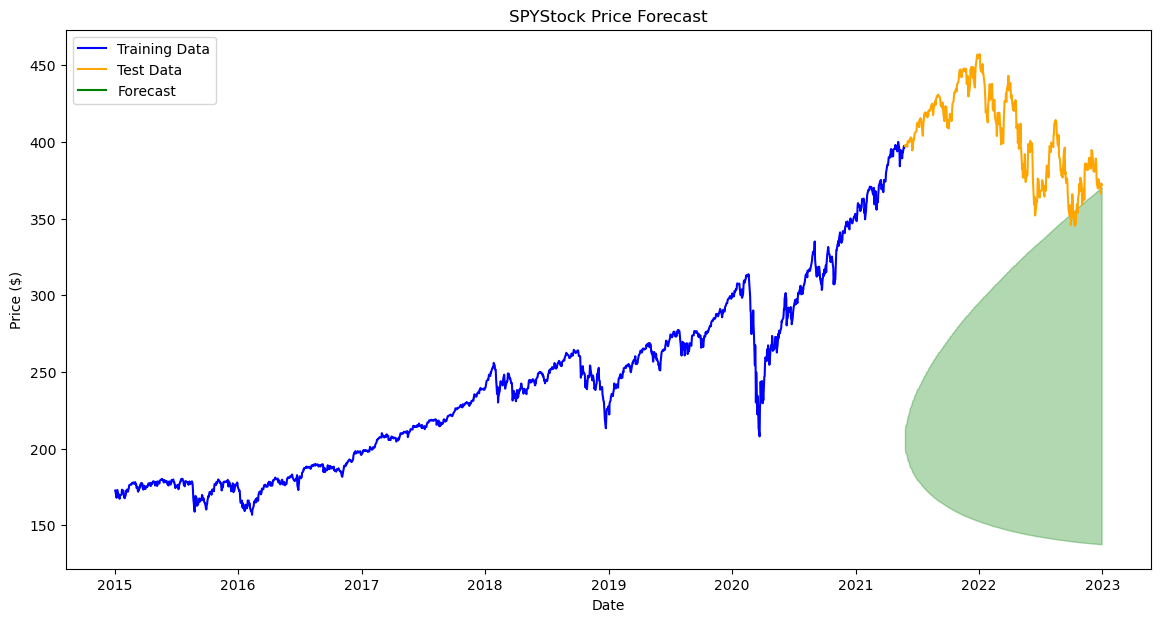

In [31]:
train,test=split_data(data_spy)
visulaize(train,test,'SPY')
